## Import Libraries 

In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read BankNote authentication csv file 

df=pd.read_csv(r"C:\Users\shopinverse\Documents\FastAPI Project\BankNote\BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
df.shape

(1372, 5)

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
import pandas as pd

# Assuming 'target_label' is the column name in your DataFrame 'df'
class_distribution = df['class'].value_counts()
print(class_distribution)


class
0    762
1    610
Name: count, dtype: int64


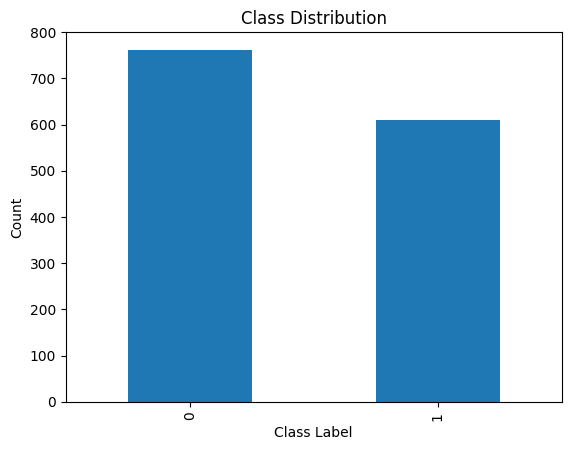

In [20]:
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

The class imbalance in the minority class is not that significant 

In [8]:
# Seperate into target label / Dependent(y) and independent(x) features

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X.shape

(1372, 4)

In [10]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [11]:
y.shape

(1372,)

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Build the Model

In [13]:
# Train Test & Split the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
# Implement Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()

classifier.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
# Prediction
y_pred=classifier.predict(X_test)

In [16]:
# Check Accuracy the model

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [17]:
score

0.9927184466019418

# Create a Pickle File 

In [18]:
# Create a Pickle file using serialization 

import pickle

# Create and assign a file path where the model will be saved locally
file_path='C:/Users/Shopinverse/Documents/FastAPI Project/BankNote/classifier.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(classifier, file)
    

In [19]:
# Load classifier/model to perform prediction

with open(file_path, 'rb') as file:
    
    clf=pickle.load(file)
    prediction=clf.predict([[0.4,1.3,-1.4,-0.5]])
    print(prediction)

[1]
